## Exploratory Data Analysis

In [1]:
#Import necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import beers data
beers = pd.read_csv('beers.csv')

In [3]:
#Explore first 5 rows of dataset 
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
#Drop unnecessary columns 
beers.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
#Look at info of columns 
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [6]:
#Look at how many unique beers there are 
beers['brewery_id'].nunique()

558

In [7]:
#Import breweries data 
breweries = pd.read_csv('breweries.csv')

In [8]:
#Look at info of breweries columns
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
Unnamed: 0    558 non-null int64
name          558 non-null object
city          558 non-null object
state         558 non-null object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [9]:
#Explore first 5 rows of dataset 
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [10]:
#Rename column to correct name of brewery id 
breweries = breweries.rename(columns={"Unnamed: 0": "brewery_id"})

In [11]:
#Look at number of unique breweries 
breweries['brewery_id'].nunique()

558

In [12]:
#Join the two dataframes on brewery_id 
df = pd.merge(breweries, beers, how="left", on="brewery_id")

In [13]:
#Explore first 5 rows of joined dataframe 
df.head()

,brewery_id,name_x,city,state,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,0.060,25.0,2688,Stronghold,American Porter,16.0


In [14]:
#Rename columns to reflect the correct names 
df = df.rename(columns={"name_x": "brewery_name", "name_y":"beer_name"})

In [15]:
#Look at info of new joined dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 10 columns):
brewery_id      2410 non-null int64
brewery_name    2410 non-null object
city            2410 non-null object
state           2410 non-null object
abv             2348 non-null float64
ibu             1405 non-null float64
id              2410 non-null int64
beer_name       2410 non-null object
style           2405 non-null object
ounces          2410 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 207.1+ KB


In [16]:
#Check for NA values 
df.isna().sum()

brewery_id         0
brewery_name       0
city               0
state              0
abv               62
ibu             1005
id                 0
beer_name          0
style              5
ounces             0
dtype: int64

In [17]:
#Fill NAs in 'ibu' column with - 
df['ibu'] = df['ibu'].fillna(0)

In [18]:
#Check for any remaining NA values 
df.isna().sum()

brewery_id       0
brewery_name     0
city             0
state            0
abv             62
ibu              0
id               0
beer_name        0
style            5
ounces           0
dtype: int64

In [19]:
#Drop remaining NAs 
df.dropna(inplace=True)

In [20]:
#Confirm there are no NAs left in the dataset 
df.isna().sum()

brewery_id      0
brewery_name    0
city            0
state           0
abv             0
ibu             0
id              0
beer_name       0
style           0
ounces          0
dtype: int64

In [21]:
#Explore shape of the dataframe 
df.shape

(2346, 10)

In [22]:
#Print the summary statistics of the dataframe 
df.describe()

,brewery_id,abv,ibu,id,ounces
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,230.350384,0.059776,25.560102,1438.808184,13.593052
std,156.214608,0.013547,29.022453,748.618619,2.333117
min,0.000000,0.001000,0.000000,1.000000,8.400000
25%,93.000000,0.050000,0.000000,827.250000,12.000000
50%,205.000000,0.056000,18.000000,1462.500000,12.000000
75%,365.000000,0.067000,42.000000,2077.750000,16.000000
max,557.000000,0.128000,138.000000,2692.000000,32.000000


In [23]:
#Examine any potential correlations in the dataset 
df.corr()

,brewery_id,abv,ibu,id,ounces
brewery_id,1.000000,-0.098886,-0.042213,-0.499686,-0.140832
abv,-0.098886,1.000000,0.369002,0.043141,0.172432
ibu,-0.042213,0.369002,1.000000,-0.028628,-0.003340
id,-0.499686,0.043141,-0.028628,1.000000,0.101045
ounces,-0.140832,0.172432,-0.003340,0.101045,1.000000


In [24]:
#Drop the 'id' column 
df.drop('id', axis=1, inplace=True)

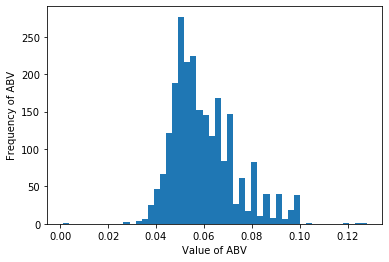

In [25]:
#Plot a histogram of the frequency of 'abv' values
plt.hist(df['abv'],bins='auto')
plt.xlabel('Value of ABV')
plt.ylabel('Frequency of ABV')
plt.show()

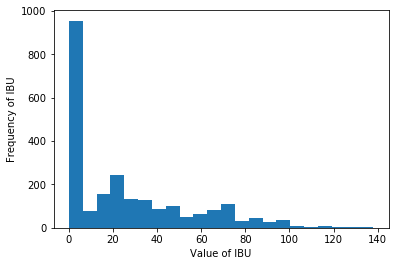

In [26]:
#Plot a histogram of the frequency of 'ibu' values
plt.hist(df['ibu'],bins='auto')
plt.xlabel('Value of IBU')
plt.ylabel('Frequency of IBU')
plt.show()

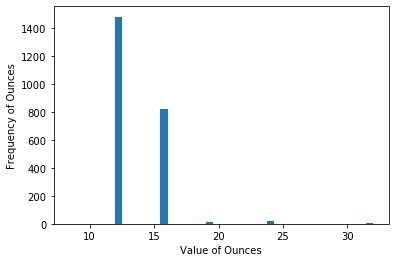

In [27]:
#Plot a histogram of the frequency of 'ounces' values
plt.hist(df['ounces'],bins='auto')
plt.xlabel('Value of Ounces')
plt.ylabel('Frequency of Ounces')
plt.show()

In [28]:
#Binning and OHE variables 